<a href="https://colab.research.google.com/github/chetanasbtech24/1RUA24CSE0107_EXP9/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("/content/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

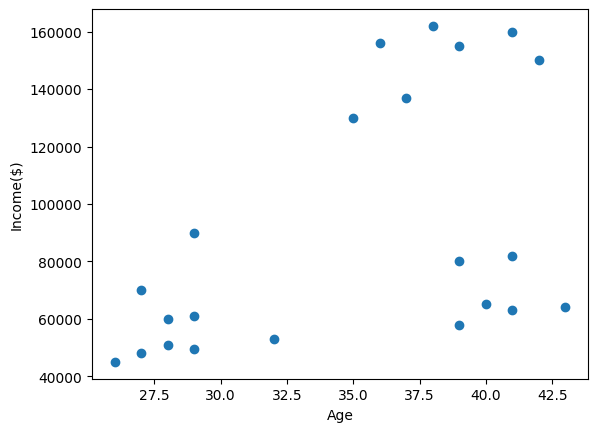

In [5]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [6]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [7]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2


In [8]:
km.cluster_centers_

array([[3.60000000e+01, 1.33500000e+05],
       [3.32000000e+01, 6.26333333e+04],
       [3.92000000e+01, 1.56600000e+05]])

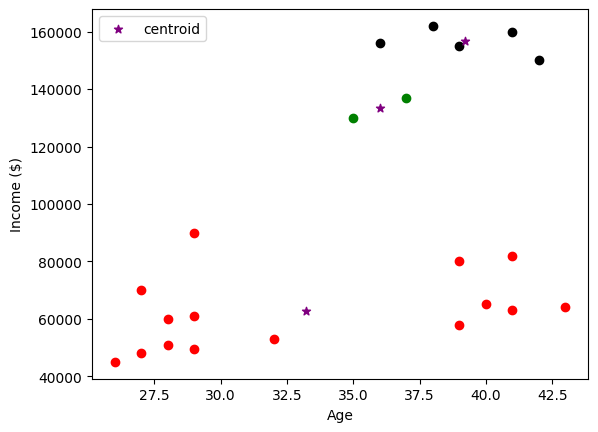

In [9]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [10]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [11]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


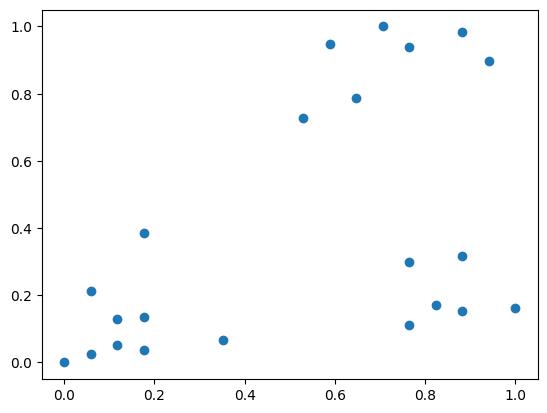

In [12]:
plt.scatter(df.Age,df['Income($)'])

In [13]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [14]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [15]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

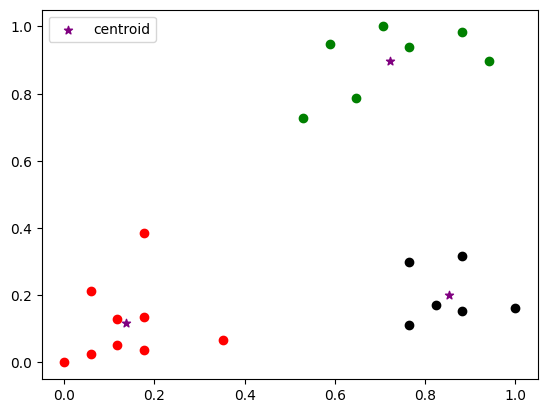

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

<h4 style='color:purple'>Elbow Plot</h4>

In [17]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

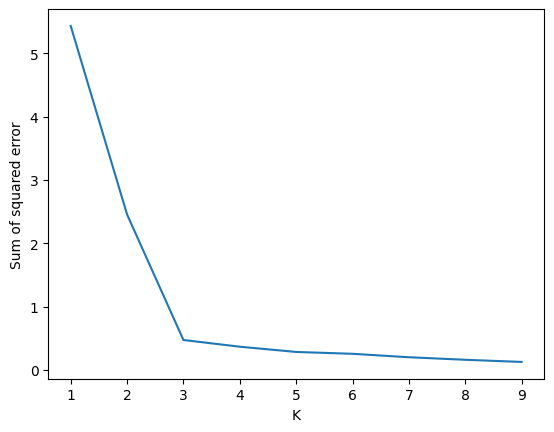

In [18]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)



---



For k = 2, Silhouette Score: 0.5305
For k = 3, Silhouette Score: 0.7130
For k = 4, Silhouette Score: 0.6136
For k = 5, Silhouette Score: 0.4663
For k = 6, Silhouette Score: 0.4579
For k = 7, Silhouette Score: 0.4494
For k = 8, Silhouette Score: 0.3155
For k = 9, Silhouette Score: 0.2898


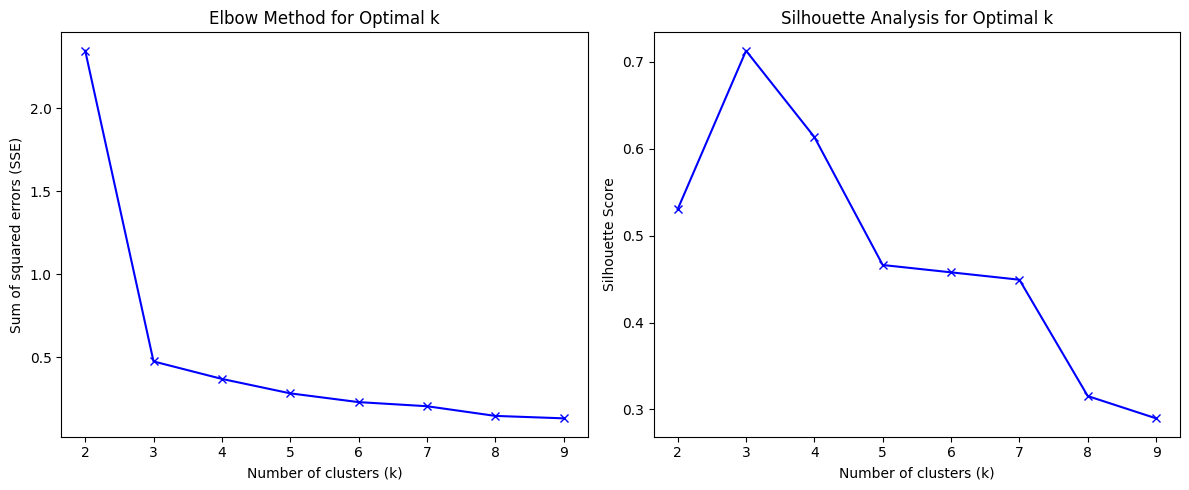


Optimal number of clusters (based on silhouette score): 3


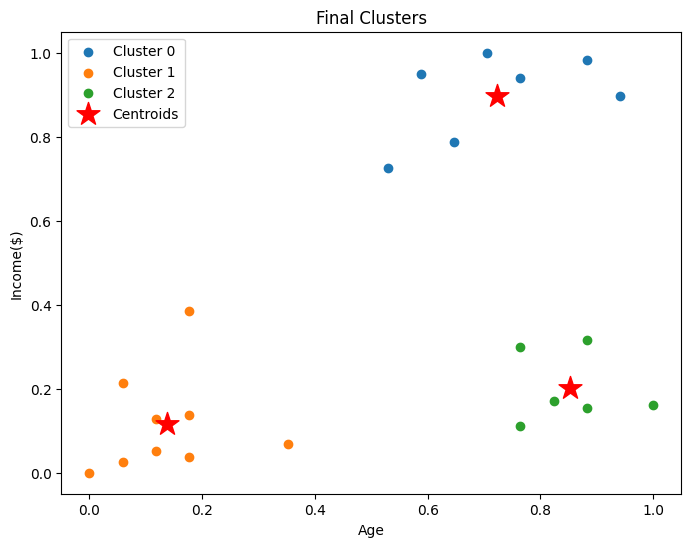

In [19]:
from sklearn.metrics import silhouette_score
import numpy as np
sse = []
silhouette_scores = []
k_rng = range(2, 10)  # Starting from 2 (silhouette requires at least 2 clusters)

# Calculate SSE and silhouette scores for different k values
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)  # Inertia = SSE

    # Silhouette score
    if k > 1:  # Silhouette score requires at least 2 clusters
        silhouette_avg = silhouette_score(df[['Age','Income($)']], km.labels_)
        silhouette_scores.append(silhouette_avg)
        print(f"For k = {k}, Silhouette Score: {silhouette_avg:.4f}")

# Plot the Elbow Method (SSE)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_rng, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal k')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')

plt.tight_layout()
plt.show()

# Determine optimal k (highest silhouette score)
optimal_k = np.argmax(silhouette_scores) + 2  # +2 because we started from k=2
print(f"\nOptimal number of clusters (based on silhouette score): {optimal_k}")

# Fit final model with optimal k
final_km = KMeans(n_clusters=optimal_k, random_state=42)
final_km.fit(df[['Age','Income($)']])
df['Cluster'] = final_km.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(df[df['Cluster'] == i]['Age'],
                df[df['Cluster'] == i]['Income($)'],
                label=f'Cluster {i}')
plt.scatter(final_km.cluster_centers_[:, 0],
            final_km.cluster_centers_[:, 1],
            s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Final Clusters')
plt.legend()
plt.show()

<h4 style='color:purple'>Exercise</h4>

<img src='iris.png' width=200 height=200>

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

# Task
Load the iris dataset, prepare the data by selecting 'petal length (cm)' and 'petal width (cm)' features, preprocess the data using MinMaxScaler, determine the optimal number of clusters using the elbow method and silhouette analysis, apply KMeans with the optimal number of clusters, and visualize the clusters and their centroids. Use `df` in the query.

## Load data

### Subtask:
Load the iris dataset from sklearn.


**Reasoning**:
The first step is to load the iris dataset using the `load_iris` function from `sklearn.datasets`.



In [20]:
from sklearn.datasets import load_iris

iris = load_iris()

## Prepare data

### Subtask:
Create a new DataFrame with only 'petal length (cm)' and 'petal width (cm)' features.


**Reasoning**:
Create a DataFrame from the iris data and select the specified columns.



In [21]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df[['petal length (cm)', 'petal width (cm)']]

**Reasoning**:
Display the head of the newly created DataFrame to verify the result.



In [22]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## Preprocess data

### Subtask:
Apply MinMaxScaler to the selected features.


**Reasoning**:
Apply MinMaxScaler to the selected features in the dataframe `df`.



In [23]:
scaler = MinMaxScaler()
df[['petal length (cm)', 'petal width (cm)']] = scaler.fit_transform(df[['petal length (cm)', 'petal width (cm)']])

**Reasoning**:
Display the first few rows of the dataframe to verify the scaling.



In [24]:
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


## Determine optimal k

### Subtask:
Use the elbow method and silhouette analysis to find the optimal number of clusters.


**Reasoning**:
Implement the elbow method and silhouette analysis to find the optimal number of clusters by iterating through different k values, calculating SSE and silhouette scores, and plotting the results.



For k = 2, Silhouette Score: 0.7417
For k = 3, Silhouette Score: 0.6763
For k = 4, Silhouette Score: 0.6004
For k = 5, Silhouette Score: 0.5764
For k = 6, Silhouette Score: 0.5828
For k = 7, Silhouette Score: 0.5793
For k = 8, Silhouette Score: 0.5920
For k = 9, Silhouette Score: 0.4475


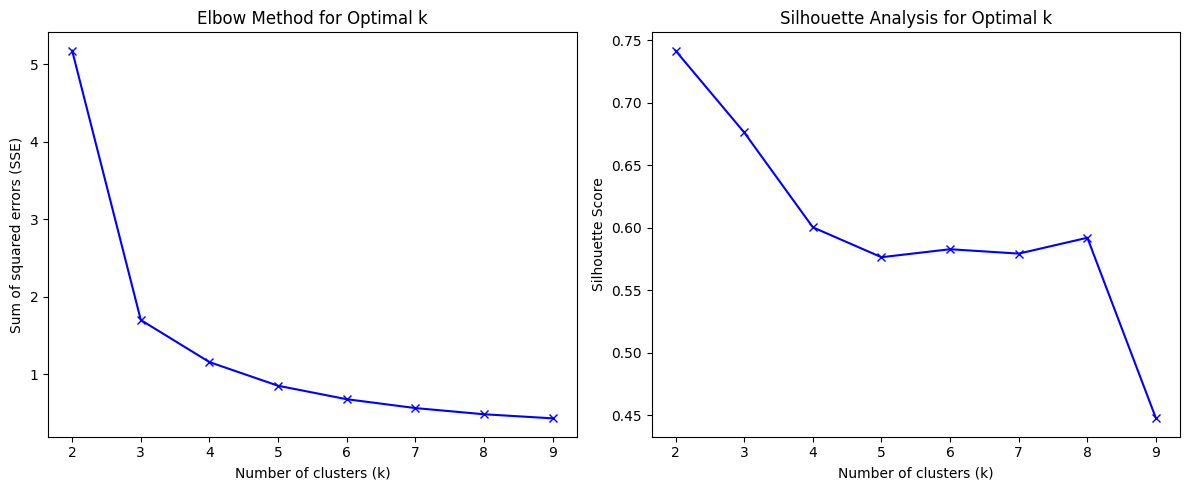


Optimal number of clusters (based on silhouette score): 2


In [25]:
sse = []
silhouette_scores = []
k_rng = range(2, 10)

for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

    if k > 1:
        silhouette_avg = silhouette_score(df[['petal length (cm)','petal width (cm)']], km.labels_)
        silhouette_scores.append(silhouette_avg)
        print(f"For k = {k}, Silhouette Score: {silhouette_avg:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_rng, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')

plt.tight_layout()
plt.show()

optimal_k = np.argmax(silhouette_scores) + 2
print(f"\nOptimal number of clusters (based on silhouette score): {optimal_k}")

## Apply kmeans

### Subtask:
Fit KMeans with the optimal number of clusters to the scaled data.


**Reasoning**:
Fit KMeans with the optimal number of clusters to the scaled data and add the cluster labels to the DataFrame.



In [26]:
final_km = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_km.fit(df[['petal length (cm)','petal width (cm)']])
df['Cluster'] = final_km.labels_
df.head()

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


## Visualize clusters

### Subtask:
Plot the clusters and their centroids.


**Reasoning**:
Plot the clusters and their centroids based on the 'petal length (cm)' and 'petal width (cm)' features, using the cluster assignments in the 'Cluster' column and the fitted KMeans model's cluster centers.



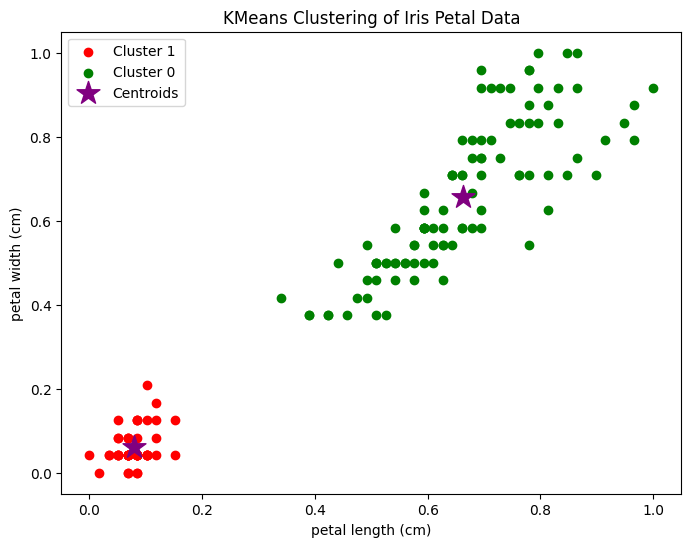

In [27]:
plt.figure(figsize=(8, 6))
unique_clusters = df['Cluster'].unique()
colors = ['green', 'red', 'black', 'blue', 'orange', 'brown'] # Define a list of colors

for i in unique_clusters:
    plt.scatter(df[df['Cluster'] == i]['petal length (cm)'],
                df[df['Cluster'] == i]['petal width (cm)'],
                color=colors[i % len(colors)], # Use modulo to cycle through colors
                label=f'Cluster {i}')

plt.scatter(final_km.cluster_centers_[:, 0],
            final_km.cluster_centers_[:, 1],
            s=300, c='purple', marker='*', label='Centroids') # Changed centroid color for better visibility

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('KMeans Clustering of Iris Petal Data')
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The 'petal length (cm)' and 'petal width (cm)' features from the iris dataset were selected for clustering analysis.
*   MinMaxScaler was successfully applied to scale the selected features, transforming their values to a range between 0 and 1.
*   Based on silhouette analysis, the optimal number of clusters was determined to be 2, corresponding to the highest silhouette score among the tested k values (from 2 to 9).
*   KMeans clustering was performed with 2 clusters on the scaled petal data.
*   A scatter plot visualized the two clusters and their respective centroids based on the scaled 'petal length (cm)' and 'petal width (cm)'.

### Insights or Next Steps

*   The analysis suggests that the iris dataset, when considering only petal dimensions, is best represented by two distinct clusters. This could imply a clear separation or grouping of species based on these features.
*   Further analysis could involve exploring other feature combinations or incorporating more advanced clustering techniques to validate the optimal number of clusters and investigate potential sub-groupings or different clustering structures.
